# Perfect model experiment: data generation

Here we demonstrate the generation of data for our perfect model experiment.

In [1]:
using Pkg; Pkg.activate("..")
using OceanTurb, ColumnModelOptimizationProject.KPPOptimization, Printf

# The 'Simple Flux' class of models

For the perfect model experiment we use 'simple flux' models.
This model features constant atmospheric buoyancy fluxes $F_b$ and velocity flux $F_u$.
We use resting initial conditions for horizontal velocity, such that

$$ U(t=0) = V(t=0) = 0 $$,

and an initial condition for $T$ that exhibits a surface mixed region and a deep stratification, so that

$$ T(t=0) = T_0 + \gamma z \, \mathrm{step}(z+h_0, d) $$

where $\gamma$ is the initial temperature gradient, $\mathrm{step}(\zeta, d)$ is a smooth Heaviside function

$$ \mathrm{step}(\zeta, d) = \tfrac{1}{2} \left ( 1 - \tanh[\zeta/d] \right ) \, , $$

and $h_0$ is the depth of the initial mixed layer. 
The initial temperature gradient $\gamma$ implies a deep buoyancy gradient of 

$$ \partial_z B(t=0, z \ll -h_0) = \alpha g \gamma \, . $$

For the perfect model runs, we fix $h_0 = 40$ meters, $d=10$ meters, use a domain with depth $L=150$ meters, a resolution of $2$ meters, and vary $F_b$ and $F_u$. 
The 6 cases we select are defined below.


In [4]:
stdkwargs = Dict(:N=>75, :L=>150, :h₀=>40, :d=>10)

models = Dict(
    "free_convection" => simple_flux_model(; dBdz = 2.5e-6, Fb = 2e-7,   Fu = 0.0,   stdkwargs...),
    "unstable_weak"   => simple_flux_model(; dBdz = 2.5e-6, Fb = 5e-9,   Fu = -5e-4, stdkwargs...),
    "unstable_strong" => simple_flux_model(; dBdz = 2.5e-5, Fb = 1e-7,   Fu = -2e-3, stdkwargs...),
    "stable_weak"     => simple_flux_model(; dBdz = 2.5e-6, Fb = -5e-11, Fu = -2e-4, stdkwargs...),
    "stable_strong"   => simple_flux_model(; dBdz = 2.5e-7, Fb = -5e-10, Fu = -2e-4, stdkwargs...),
    "neutral"         => simple_flux_model(; dBdz = 2.5e-6, Fb = 0,      Fu = -8e-4, stdkwargs...)
);

# Visualization of model result

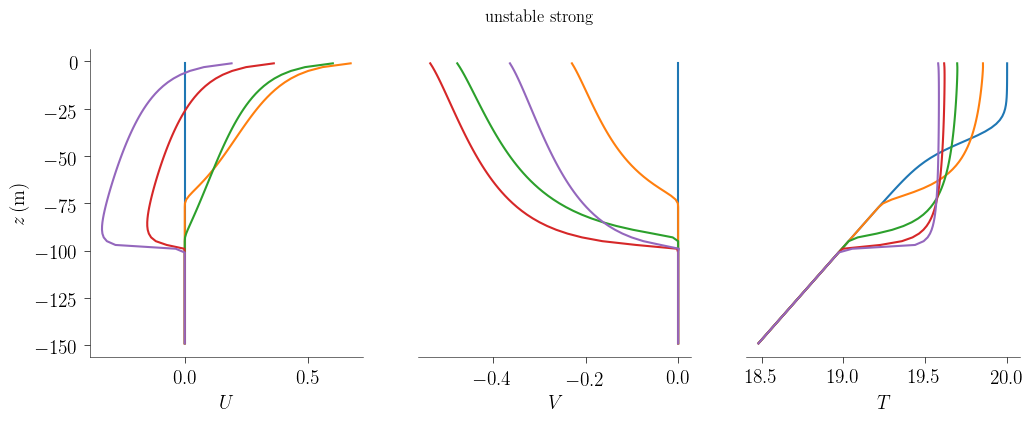

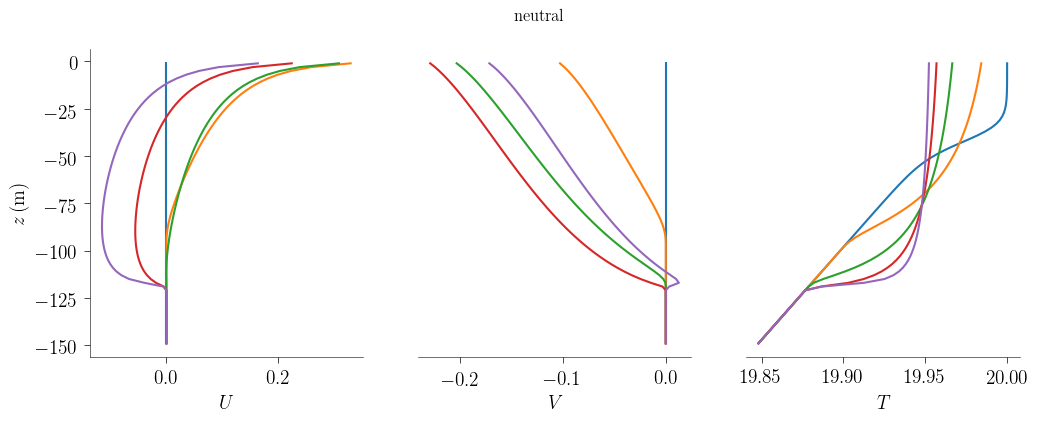

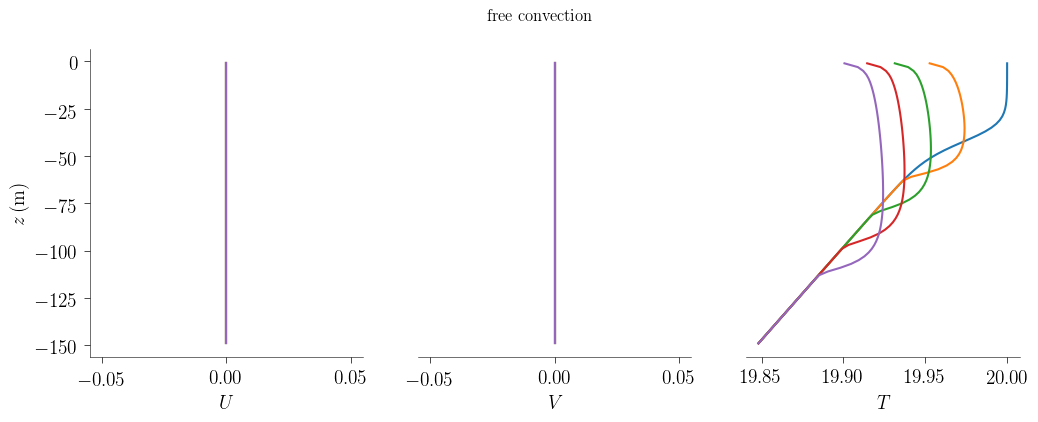

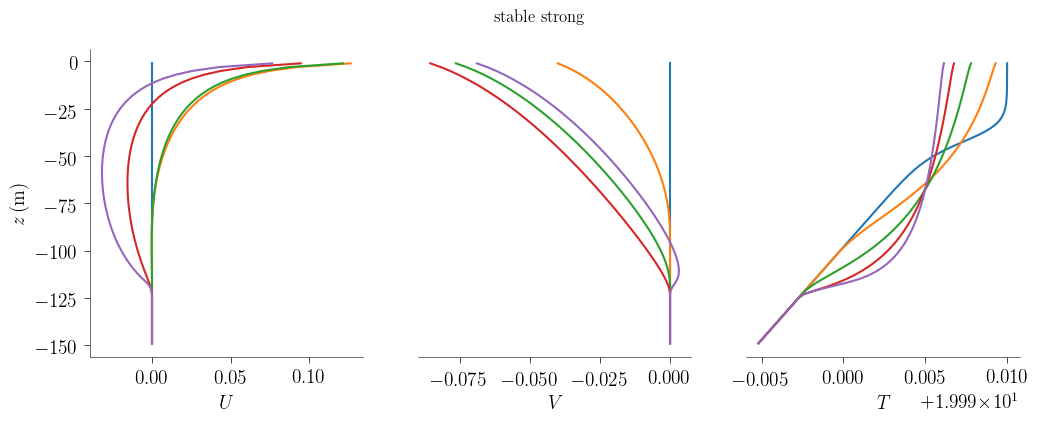

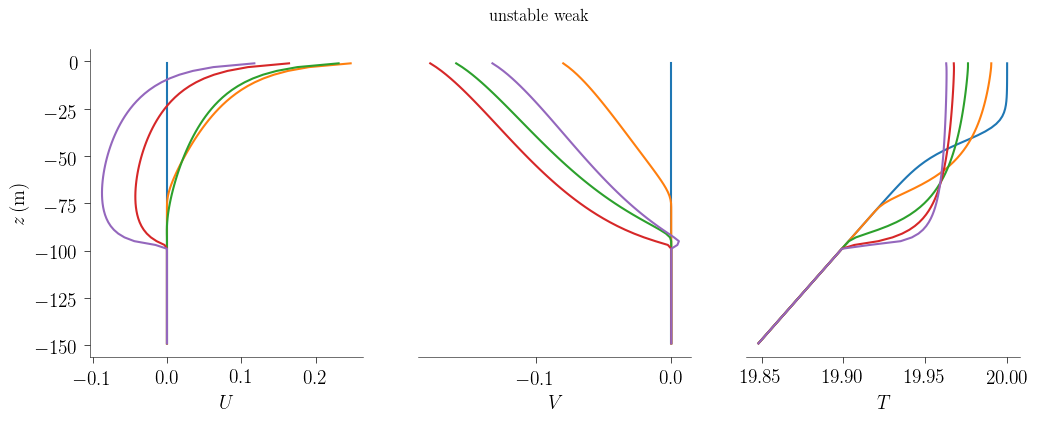

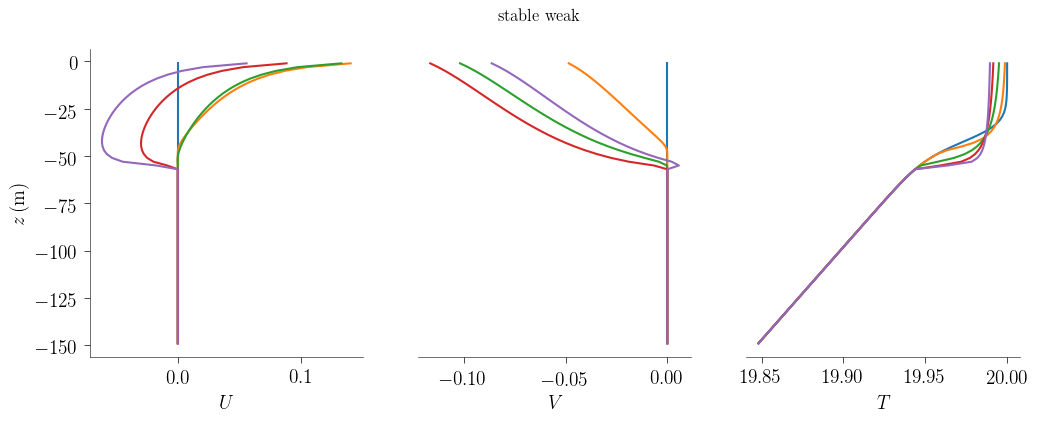

In [5]:
for (case, model) in models
    fig, axs = visualize_model(model, dt=10*minute, dout=3*hour, tfinal=12*hour)
    fig.suptitle(replace(case, "_" => " "))
end

In [6]:
for (case, model) in models
    @printf "Generating data for case %s..." case
    filepath = joinpath("..", "data", "coarse_perfect_model_experiment", "$case.jld2")
    @time generate_data(filepath, model; dout=1*hour, tfinal=2*day)
end 

Generating data for case unstable_strong...  3.119429 seconds (18.04 M allocations: 491.482 MiB, 7.56% gc time)
Generating data for case neutral...  0.707884 seconds (11.07 M allocations: 171.691 MiB, 2.36% gc time)
Generating data for case free_convection...  0.812593 seconds (12.16 M allocations: 188.272 MiB, 1.67% gc time)
Generating data for case stable_strong...  0.861315 seconds (11.08 M allocations: 171.786 MiB, 1.47% gc time)
Generating data for case unstable_weak...  0.850535 seconds (11.69 M allocations: 181.165 MiB, 1.47% gc time)
Generating data for case stable_weak...  0.807718 seconds (10.21 M allocations: 158.566 MiB, 1.34% gc time)
